In [110]:
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from scipy import stats

In [2]:
origin_df = pd.read_csv('train.csv', low_memory = False)
origin_df.head(30)

GameId          PlayId  Team      X      Y     S     A   Dis  \
0   2017090700  20170907000118  away  73.91  34.84  1.69  1.13  0.40   
1   2017090700  20170907000118  away  74.67  32.64  0.42  1.35  0.01   
2   2017090700  20170907000118  away  74.00  33.20  1.22  0.59  0.31   
3   2017090700  20170907000118  away  71.46  27.70  0.42  0.54  0.02   
4   2017090700  20170907000118  away  69.32  35.42  1.82  2.43  0.16   
5   2017090700  20170907000118  away  75.06  24.00  1.01  0.32  0.18   
6   2017090700  20170907000118  away  74.11  16.64  1.11  0.83  0.02   
7   2017090700  20170907000118  away  73.37  18.73  1.24  0.74  0.13   
8   2017090700  20170907000118  away  56.63  26.90  0.26  1.86  0.28   
9   2017090700  20170907000118  away  73.35  38.83  4.55  0.76  0.51   
10  2017090700  20170907000118  away  74.15  28.90  0.72  0.73  0.01   
11  2017090700  20170907000118  home  75.82  17.56  2.30  1.39  0.55   
12  2017090700  20170907000118  home  74.78  33.21  1.71  0.82  0.19   
13  2017090700  20170907000118  home  75.43  32.41  1.50  1.36  0.32   
14  2017090700  20170907000118  home  75.90  25.12  1.38  0.80  0.19   
15  2017090700  20170907000118  home  79.76  29.49  0.84  1.22  0.00   
16  2017090700  20170907000118  home  76.47  36.91  5.15  0.77  0.59   
17  2017090700  20170907000118  home  74.70  19.19  2.10  1.48  0.51   
18  2017090700  20170907000118  home  78.75  30.53  3.63  3.35  0.38   
19  2017090700  20170907000118  home  74.60  31.88  1.86  1.51  0.17   
20  2017090700  20170907000118  home  74.58  29.12  1.00  0.69  0.22   
21  2017090700  20170907000118  home  74.58  28.47  1.70  1.55  0.24   
22  2017090700  20170907000139  away  65.73  33.88  1.53  2.16  0.20   
23  2017090700  20170907000139  away  66.04  30.09  1.20  1.06  0.01   
24  2017090700  20170907000139  away  66.02  31.50  0.73  0.84  0.13   
25  2017090700  20170907000139  away  63.31  27.19  1.84  1.02  0.24   
26  2017090700  20170907000139  away  60.51  26.51  2.79  2.67  0.28   
27  2017090700  20170907000139  away  66.60  24.27  1.18  1.63  0.19   
28  2017090700  20170907000139  away  65.12   9.43  2.05  1.73  0.31   
29  2017090700  20170907000139  away  65.18  16.36  2.28  2.24  0.34   

    Orientation     Dir  ...  Week           Stadium        Location  \
0         81.99  177.18  ...     1  Gillette Stadium  Foxborough, MA   
1         27.61  198.70  ...     1  Gillette Stadium  Foxborough, MA   
2          3.01  202.73  ...     1  Gillette Stadium  Foxborough, MA   
3        359.77  105.64  ...     1  Gillette Stadium  Foxborough, MA   
4         12.63  164.31  ...     1  Gillette Stadium  Foxborough, MA   
5        308.34   95.01  ...     1  Gillette Stadium  Foxborough, MA   
6        357.23  322.59  ...     1  Gillette Stadium  Foxborough, MA   
7        328.52  270.04  ...     1  Gillette Stadium  Foxborough, MA   
8        344.70   55.31  ...     1  Gillette Stadium  Foxborough, MA   
9         75.47  190.84  ...     1  Gillette Stadium  Foxborough, MA   
10       342.58  274.14  ...     1  Gillette Stadium  Foxborough, MA   
11       178.97  284.15  ...     1  Gillette Stadium  Foxborough, MA   
12       178.82  215.90  ...     1  Gillette Stadium  Foxborough, MA   
13       207.08  222.76  ...     1  Gillette Stadium  Foxborough, MA   
14       133.01  198.55  ...     1  Gillette Stadium  Foxborough, MA   
15       192.18  110.86  ...     1  Gillette Stadium  Foxborough, MA   
16       112.02  195.09  ...     1  Gillette Stadium  Foxborough, MA   
17       152.14  278.52  ...     1  Gillette Stadium  Foxborough, MA   
18       161.98  245.74  ...     1  Gillette Stadium  Foxborough, MA   
19       218.49  267.32  ...     1  Gillette Stadium  Foxborough, MA   
20       169.36  242.05  ...     1  Gillette Stadium  Foxborough, MA   
21       207.09  255.67  ...     1  Gillette Stadium  Foxborough, MA   
22        70.30  165.70  ...     1  Gillette Stadium  Foxborough, MA   
23       354.01  254.78  ...     1  Gillette St

In [3]:
origin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509762 entries, 0 to 509761
Data columns (total 49 columns):
GameId                    509762 non-null int64
PlayId                    509762 non-null int64
Team                      509762 non-null object
X                         509762 non-null float64
Y                         509762 non-null float64
S                         509762 non-null float64
A                         509762 non-null float64
Dis                       509762 non-null float64
Orientation               509744 non-null float64
Dir                       509748 non-null float64
NflId                     509762 non-null int64
DisplayName               509762 non-null object
JerseyNumber              509762 non-null int64
Season                    509762 non-null int64
YardLine                  509762 non-null int64
Quarter                   509762 non-null int64
GameClock                 509762 non-null object
PossessionTeam            509762 non-null object
Down   

In [ ]:
# GameId - a unique game identifier
# PlayId - a unique play identifier
# Team - home or away
# X - player position along the long axis of the field. See figure below.
# Y - player position along the short axis of the field. See figure below.
# S - speed in yards/second
# A - acceleration in yards/second^2
# Dis - distance traveled from prior time point, in yards
# Orientation - orientation of player (deg)
# Dir - angle of player motion (deg)
# NflId - a unique identifier of the player
# DisplayName - player's name
# JerseyNumber - jersey number
# Season - year of the season
# YardLine - the yard line of the line of scrimmage
# Quarter - game quarter (1-5, 5 == overtime)
# GameClock - time on the game clock
# PossessionTeam - team with possession
# Down - the down (1-4)
# Distance - yards needed for a first down
# FieldPosition - which side of the field the play is happening on
# HomeScoreBeforePlay - home team score before play started
# VisitorScoreBeforePlay - visitor team score before play started
# NflIdRusher - the NflId of the rushing player
# OffenseFormation - offense formation
# OffensePersonnel - offensive team positional grouping
# DefendersInTheBox - number of defenders lined up near the line of scrimmage, spanning the width of the offensive line
# DefensePersonnel - defensive team positional grouping
# PlayDirection - direction the play is headed
# TimeHandoff - UTC time of the handoff
# TimeSnap - UTC time of the snap
# Yards - the yardage gained on the play (you are predicting this)
# PlayerHeight - player height (ft-in)
# PlayerWeight - player weight (lbs)
# PlayerBirthDate - birth date (mm/dd/yyyy)
# PlayerCollegeName - where the player attended college
# Position - the player's position (the specific role on the field that they typically play)
# HomeTeamAbbr - home team abbreviation
# VisitorTeamAbbr - visitor team abbreviation
# Week - week into the season
# Stadium - stadium where the game is being played
# Location - city where the game is being played
# StadiumType - description of the stadium environment
# Turf - description of the field surface
# GameWeather - description of the game weather
# Temperature - temperature (deg F)
# Humidity - humidity
# WindSpeed - wind speed in miles/hour
# WindDirection - wind direction

In [4]:
working_df = origin_df.copy()

In [5]:
working_df.drop(columns=['PlayerBirthDate', 'PlayerCollegeName'], axis= 1, inplace= True)

In [6]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509762 entries, 0 to 509761
Data columns (total 47 columns):
GameId                    509762 non-null int64
PlayId                    509762 non-null int64
Team                      509762 non-null object
X                         509762 non-null float64
Y                         509762 non-null float64
S                         509762 non-null float64
A                         509762 non-null float64
Dis                       509762 non-null float64
Orientation               509744 non-null float64
Dir                       509748 non-null float64
NflId                     509762 non-null int64
DisplayName               509762 non-null object
JerseyNumber              509762 non-null int64
Season                    509762 non-null int64
YardLine                  509762 non-null int64
Quarter                   509762 non-null int64
GameClock                 509762 non-null object
PossessionTeam            509762 non-null object
Down   

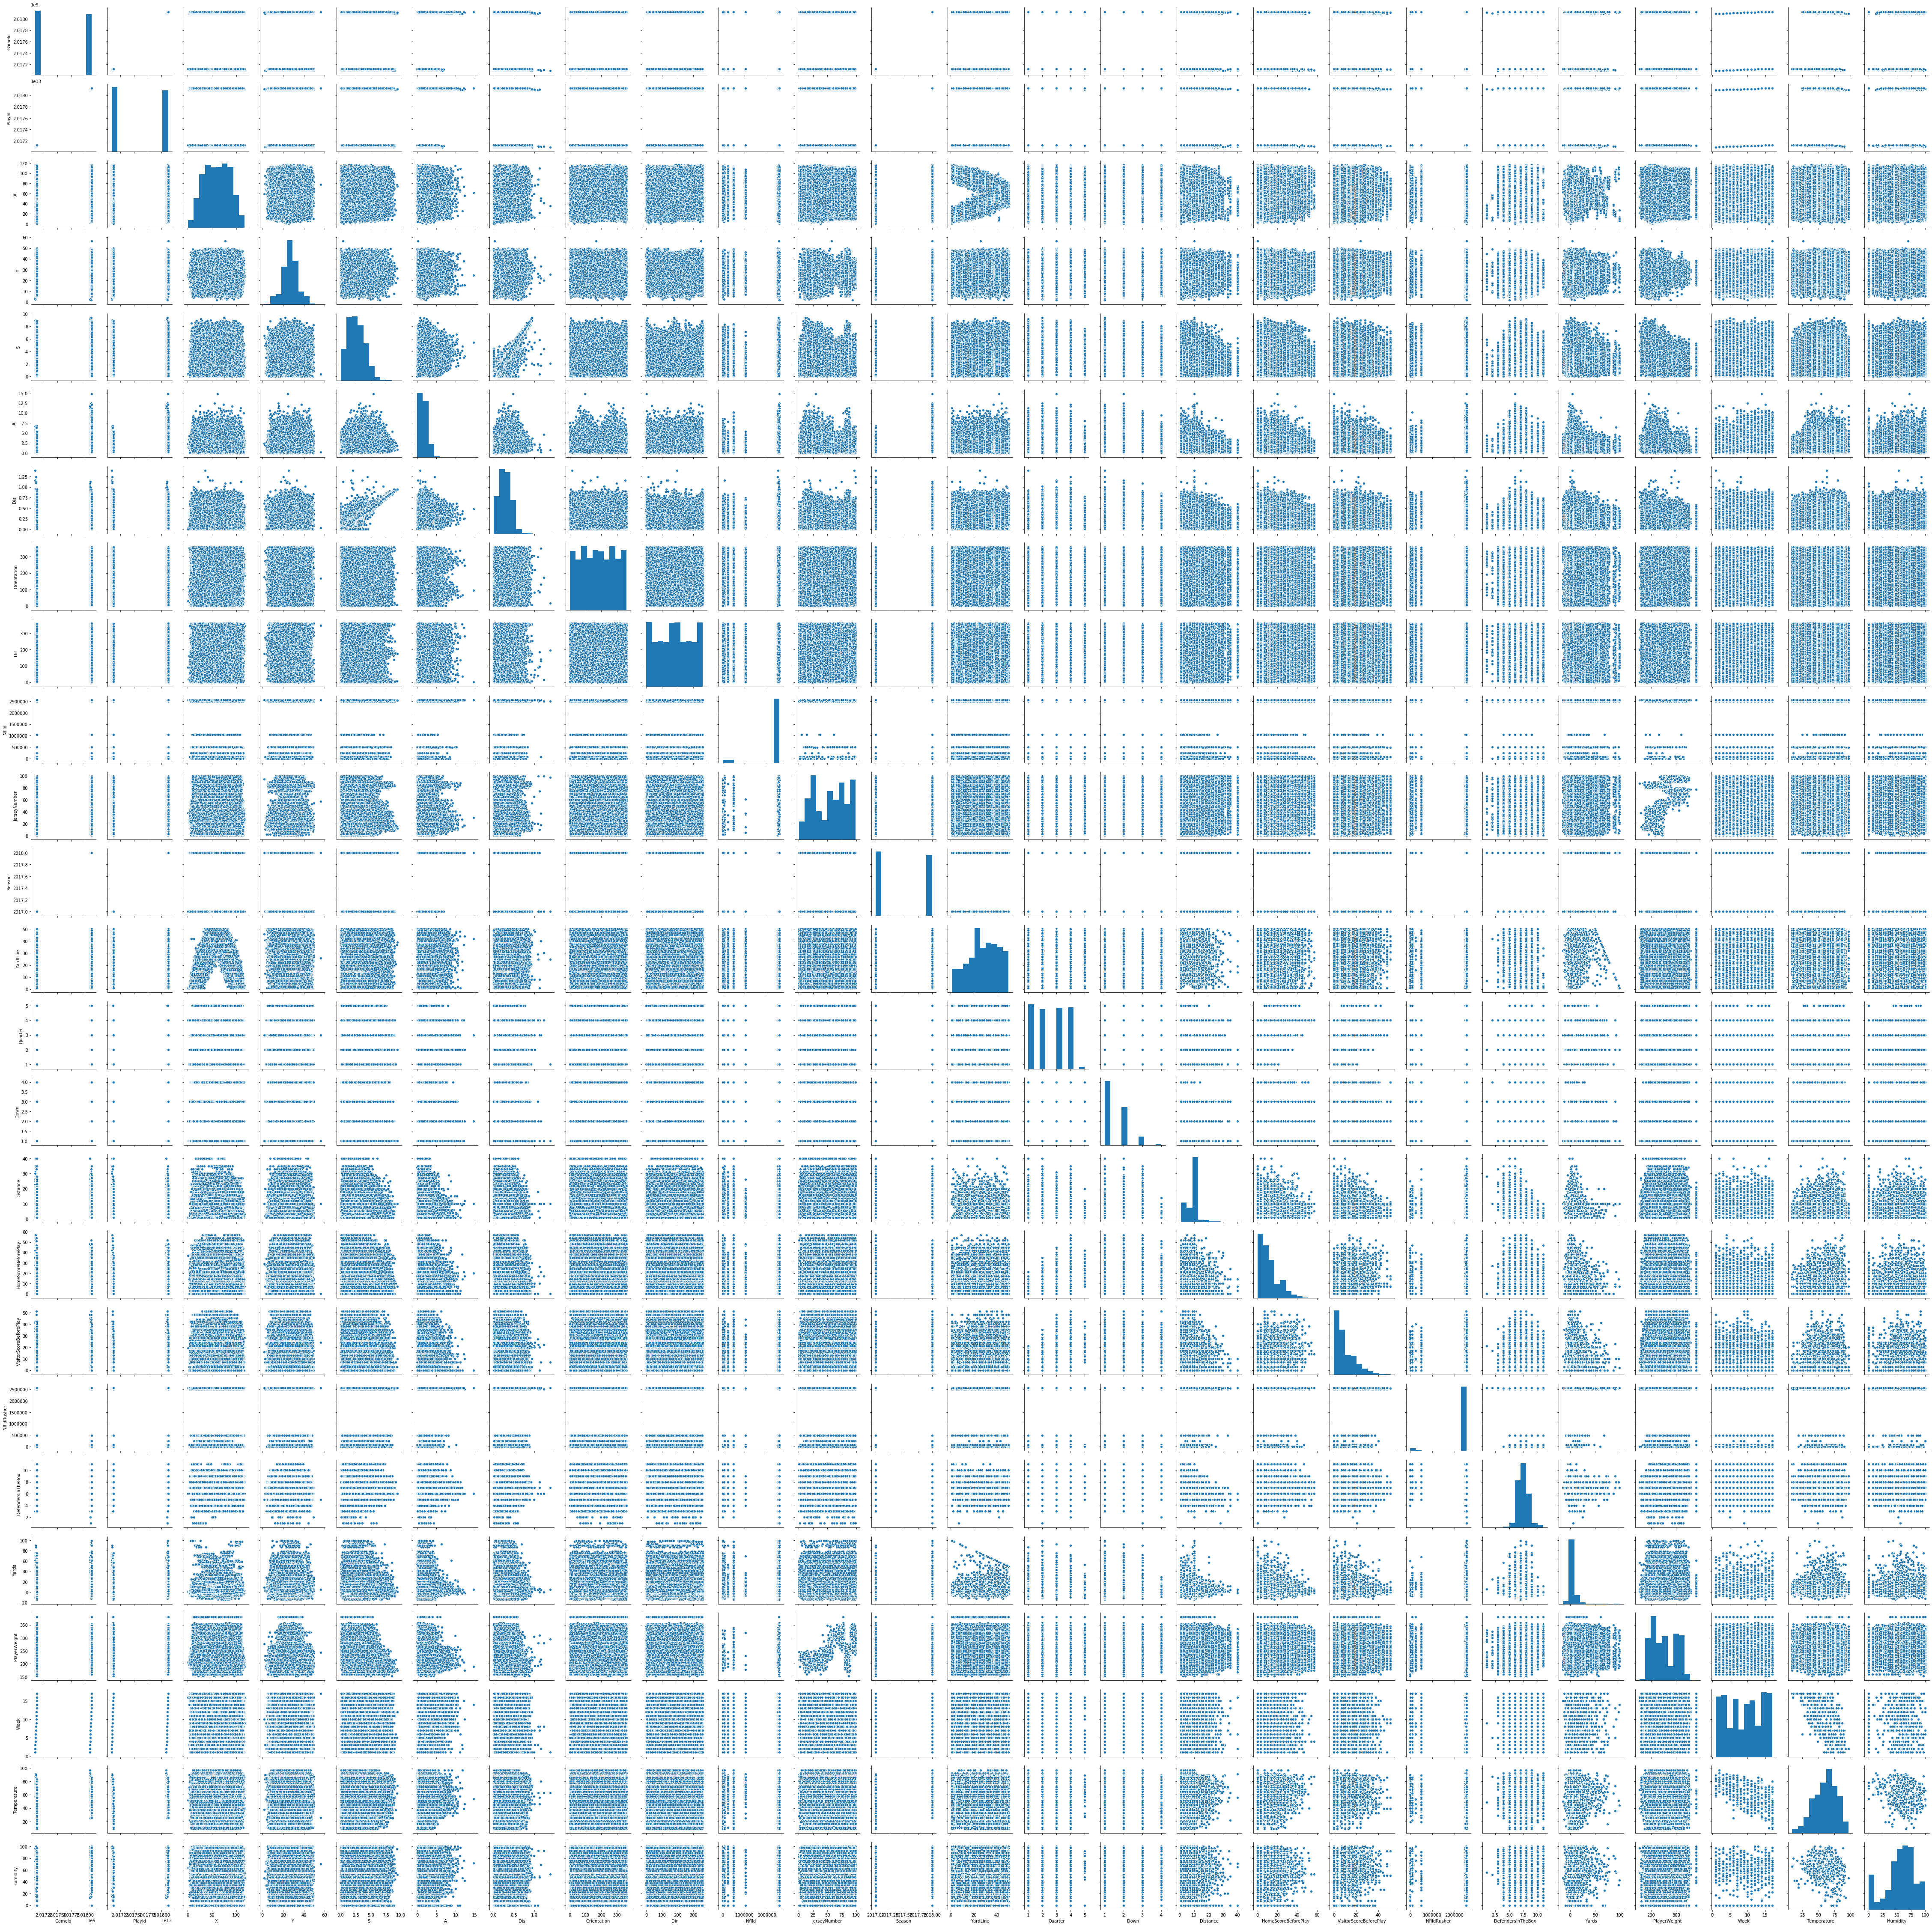

In [7]:
sns.pairplot(working_df.select_dtypes(exclude='object'))

In [8]:
origin_df.shape


(509762, 49)

In [13]:
#print (working_df[working_df['DisplayName'] == 'Kyle Murphy'])

In [14]:
working_df.drop(columns=['Stadium', 'Location', 'StadiumType', 'GameWeather', 'Temperature', 'Humidity', 'WindSpeed', 'WindDirection'], axis=1, inplace=True)


In [15]:
working_df.shape

(509762, 39)

In [25]:
working_df['HomeTeamAbbr'].unique()

array(['NE', 'BUF', 'CHI', 'CIN', 'CLE', 'DET', 'HOU', 'TEN', 'WAS', 'LA',
       'GB', 'SF', 'DAL', 'MIN', 'DEN', 'BAL', 'CAR', 'IND', 'JAX', 'KC',
       'NO', 'PIT', 'TB', 'LAC', 'OAK', 'SEA', 'ATL', 'NYG', 'NYJ', 'PHI',
       'ARI', 'MIA'], dtype=object)

In [26]:
working_df['VisitorTeamAbbr'].unique()

array(['KC', 'NYJ', 'ATL', 'BAL', 'PIT', 'ARI', 'JAX', 'OAK', 'PHI',
       'IND', 'SEA', 'CAR', 'NYG', 'NO', 'LAC', 'HOU', 'CLE', 'BUF',
       'TEN', 'NE', 'MIN', 'CHI', 'MIA', 'DAL', 'WAS', 'SF', 'GB', 'DET',
       'LA', 'DEN', 'TB', 'CIN'], dtype=object)

In [70]:
# AFC EAST DFs

In [45]:
ne_home = working_df['HomeTeamAbbr'] == 'NE'
ne_away = working_df['VisitorTeamAbbr'] == 'NE'

NE_df = working_df[ne_home | ne_away]
NE_df.shape

(32758, 39)

In [46]:
buf_home = working_df['HomeTeamAbbr'] == 'BUF'
buf_away = working_df['VisitorTeamAbbr'] == 'BUF'

BUF_df = working_df[buf_home | buf_away]
BUF_df.shape

(32868, 39)

In [47]:
nyj_home = working_df['HomeTeamAbbr'] == 'NYJ'
nyj_away = working_df['VisitorTeamAbbr'] == 'NYJ'

NYJ_df = working_df[nyj_home | nyj_away]
NYJ_df.shape

(32626, 39)

In [48]:
mia_home = working_df['HomeTeamAbbr'] == 'MIA'
mia_away = working_df['VisitorTeamAbbr'] == 'MIA'

MIA_df = working_df[mia_home | mia_away]
MIA_df.shape

(31636, 39)

In [71]:
# AFC WEST DFs

In [57]:
kc_home = working_df['HomeTeamAbbr'] == 'KC'
kc_away = working_df['VisitorTeamAbbr'] == 'KC'

KC_df = working_df[kc_home | kc_away]
KC_df.shape

(31196, 39)

In [58]:
oak_home = working_df['HomeTeamAbbr'] == 'OAK'
oak_away = working_df['VisitorTeamAbbr'] == 'OAK'

OAK_df = working_df[oak_home | oak_away]
OAK_df.shape

(32934, 39)

In [59]:
den_home = working_df['HomeTeamAbbr'] == 'DEN'
den_away = working_df['VisitorTeamAbbr'] == 'DEN'

DEN_df = working_df[den_home | den_away]
DEN_df.shape

(33176, 39)

In [60]:
lac_home = working_df['HomeTeamAbbr'] == 'LAC'
lac_away = working_df['VisitorTeamAbbr'] == 'LAC'

LAC_df = working_df[lac_home | lac_away]
LAC_df.shape

(32252, 39)

In [109]:
LAC_df.head()

GameId          PlayId  Team      X      Y     S     A   Dis  \
13728  2017091101  20170911010052  away  86.01  31.23  2.42  0.33  0.29   
13729  2017091101  20170911010052  away  83.57  29.38  3.11  0.40  0.44   
13730  2017091101  20170911010052  away  83.33  35.21  2.44  0.45  0.33   
13731  2017091101  20170911010052  away  86.03  34.47  2.50  2.21  0.32   
13732  2017091101  20170911010052  away  81.22  29.21  4.30  1.04  0.50   

       Orientation     Dir  ...               TimeHandoff  \
13728       357.68   39.95  ...  2017-09-12T02:22:03.000Z   
13729       307.00  355.64  ...  2017-09-12T02:22:03.000Z   
13730        29.82   23.73  ...  2017-09-12T02:22:03.000Z   
13731        48.44   52.54  ...  2017-09-12T02:22:03.000Z   
13732       331.39   10.34  ...  2017-09-12T02:22:03.000Z   

                       TimeSnap  Yards  PlayerHeight  PlayerWeight  Position  \
13728  2017-09-12T02:22:01.000Z      1           6-2           300        DT   
13729  2017-09-12T02:22:01.000Z      1           6-1           311        NT   
13730  2017-09-12T02:22:01.000Z      1          5-11           192        CB   
13731  2017-09-12T02:22:01.000Z      1           6-2           247        DE   
13732  2017-09-12T02:22:01.000Z      1           6-2           235       MLB   

      HomeTeamAbbr VisitorTeamAbbr  Week   Turf  
13728          DEN             LAC     1  Grass  
13729          DEN             LAC     1  Grass  
13730          DEN             LAC     1  Grass  
13731          DEN             LAC     1  Grass  
13732          DEN             LAC     1  Grass  

[5 rows x 39 columns]

In [72]:
# AFC NORTH DFs

In [61]:
bal_home = working_df['HomeTeamAbbr'] == 'BAL'
bal_away = working_df['VisitorTeamAbbr'] == 'BAL'

BAL_df = working_df[bal_home | bal_away]
BAL_df.shape

(32912, 39)

In [62]:
pit_home = working_df['HomeTeamAbbr'] == 'PIT'
pit_away = working_df['VisitorTeamAbbr'] == 'PIT'

PIT_df = working_df[pit_home | pit_away]
PIT_df.shape

(29964, 39)

In [63]:
cle_home = working_df['HomeTeamAbbr'] == 'CLE'
cle_away = working_df['VisitorTeamAbbr'] == 'CLE'

CLE_df = working_df[cle_home | cle_away]
CLE_df.shape

(31350, 39)

In [64]:
cin_home = working_df['HomeTeamAbbr'] == 'CIN'
cin_away = working_df['VisitorTeamAbbr'] == 'CIN'

CIN_df = working_df[cin_home | cin_away]
CIN_df.shape

(32296, 39)

In [73]:
# AFC SOUTH DFs

In [66]:
hou_home = working_df['HomeTeamAbbr'] == 'HOU'
hou_away = working_df['VisitorTeamAbbr'] == 'HOU'

HOU_df = working_df[hou_home | hou_away]
HOU_df.shape

(32054, 39)

In [67]:
ten_home = working_df['HomeTeamAbbr'] == 'TEN'
ten_away = working_df['VisitorTeamAbbr'] == 'TEN'

TEN_df = working_df[ten_home | ten_away]
TEN_df.shape

(32340, 39)

In [68]:
ind_home = working_df['HomeTeamAbbr'] == 'IND'
ind_away = working_df['VisitorTeamAbbr'] == 'IND'

IND_df = working_df[ind_home | ind_away]
IND_df.shape

(33308, 39)

In [69]:
jax_home = working_df['HomeTeamAbbr'] == 'JAX'
jax_away = working_df['VisitorTeamAbbr'] == 'JAX'

JAX_df = working_df[jax_home | jax_away]
JAX_df.shape

(33044, 39)

In [74]:
# NFC EAST DFs

In [78]:
phi_home = working_df['HomeTeamAbbr'] == 'PHI'
phi_away = working_df['VisitorTeamAbbr'] == 'PHI'

PHI_df = working_df[phi_home | phi_away]
PHI_df.shape

(28644, 39)

In [79]:
dal_home = working_df['HomeTeamAbbr'] == 'DAL'
dal_away = working_df['VisitorTeamAbbr'] == 'DAL'

DAL_df = working_df[dal_home | dal_away]
DAL_df.shape

(31790, 39)

In [80]:
nyg_home = working_df['HomeTeamAbbr'] == 'NYG'
nyg_away = working_df['VisitorTeamAbbr'] == 'NYG'

NYG_df = working_df[nyg_home | nyg_away]
NYG_df.shape

(32692, 39)

In [81]:
was_home = working_df['HomeTeamAbbr'] == 'WAS'
was_away = working_df['VisitorTeamAbbr'] == 'WAS'

WAS_df = working_df[was_home | was_away]
WAS_df.shape

(31746, 39)

In [75]:
# NFC WEST DFs

In [82]:
sf_home = working_df['HomeTeamAbbr'] == 'SF'
sf_away = working_df['VisitorTeamAbbr'] == 'SF'

SF_df = working_df[sf_home | sf_away]
SF_df.shape

(33704, 39)

In [83]:
sea_home = working_df['HomeTeamAbbr'] == 'SEA'
sea_away = working_df['VisitorTeamAbbr'] == 'SEA'

SEA_df = working_df[sea_home | sea_away]
SEA_df.shape

(32736, 39)

In [88]:
la_home = working_df['HomeTeamAbbr'] == 'LA'
la_away = working_df['VisitorTeamAbbr'] == 'LA'

LA_df = working_df[la_home | la_away]
LA_df.shape

(33506, 39)

In [89]:
ari_home = working_df['HomeTeamAbbr'] == 'ARI'
ari_away = working_df['VisitorTeamAbbr'] == 'ARI'

ARI_df = working_df[ari_home | ari_away]
ARI_df.shape

(32736, 39)

In [76]:
# NFC NORTH DFs

In [90]:
gb_home = working_df['HomeTeamAbbr'] == 'GB'
gb_away = working_df['VisitorTeamAbbr'] == 'GB'

GB_df = working_df[gb_home | gb_away]
GB_df.shape

(30624, 39)

In [91]:
min_home = working_df['HomeTeamAbbr'] == 'MIN'
min_away = working_df['VisitorTeamAbbr'] == 'MIN'

MIN_df = working_df[min_home | min_away]
MIN_df.shape

(31944, 39)

In [92]:
chi_home = working_df['HomeTeamAbbr'] == 'CHI'
chi_away = working_df['VisitorTeamAbbr'] == 'CHI'

CHI_df = working_df[chi_home | chi_away]
CHI_df.shape

(31372, 39)

In [93]:
det_home = working_df['HomeTeamAbbr'] == 'DET'
det_away = working_df['VisitorTeamAbbr'] == 'DET'

DET_df = working_df[det_home | det_away]
DET_df.shape

(31614, 39)

In [77]:
# NFC SOUTH DFs

In [94]:
no_home = working_df['HomeTeamAbbr'] == 'NO'
no_away = working_df['VisitorTeamAbbr'] == 'NO'

NO_df = working_df[no_home | no_away]
NO_df.shape

(31592, 39)

In [95]:
tb_home = working_df['HomeTeamAbbr'] == 'TB'
tb_away = working_df['VisitorTeamAbbr'] == 'TB'

TB_df = working_df[tb_home | tb_away]
TB_df.shape

(30074, 39)

In [96]:
atl_home = working_df['HomeTeamAbbr'] == 'ATL'
atl_away = working_df['VisitorTeamAbbr'] == 'ATL'

ATL_df = working_df[atl_home | atl_away]
ATL_df.shape

(30338, 39)

In [97]:
car_home = working_df['HomeTeamAbbr'] == 'CAR'
car_away = working_df['VisitorTeamAbbr'] == 'CAR'

CAR_df = working_df[car_home | car_away]
CAR_df.shape

(27698, 39)

In [104]:
print (working_df[working_df['DisplayName'] == 'Eddie Lacy'])

            GameId          PlayId  Team      X      Y     S     A   Dis  \
10035   2017091010  20170910100411  away  64.64  19.37  5.89  2.62  0.59   
10058   2017091010  20170910100445  away  62.73  22.76  3.16  2.18  0.48   
10189   2017091010  20170910100773  away  90.82  29.58  3.41  3.15  0.34   
10321   2017091010  20170910101379  away  37.02  31.93  3.95  1.06  0.43   
10563   2017091010  20170910102513  away  86.93  26.05  5.50  3.00  0.57   
...            ...             ...   ...    ...    ...   ...   ...   ...   
175388  2017112608  20171126083729  away  21.03  27.37  3.65  1.12  0.43   
175411  2017112608  20171126083837  away  51.05  23.23  4.08  2.64  0.42   
175454  2017112608  20171126083998  away  60.74  26.39  3.66  2.06  0.39   
175476  2017112608  20171126084043  away  84.36  34.07  4.47  1.75  0.53   
193812  2017120313  20171203130819  home  53.18  25.35  3.39  2.84  0.58   

        Orientation     Dir  ...               TimeHandoff  \
10035        127.43  208.

In [105]:
print (working_df[working_df['DisplayName'] == 'Jared Goff'])

            GameId          PlayId  Team       X      Y     S     A   Dis  \
8907    2017091009  20170910090051  home   90.26  23.34  3.88  1.26  0.41   
9061    2017091009  20170910090590  home   90.67  28.05  4.16  1.16  0.41   
9083    2017091009  20170910090611  home   87.06  29.43  3.68  1.12  0.37   
9105    2017091009  20170910090656  home   75.61  29.45  3.18  2.33  0.35   
9127    2017091009  20170910090682  home   67.60  30.65  3.61  1.27  0.39   
...            ...             ...   ...     ...    ...   ...   ...   ...   
508063  2018123014  20181230143137  home   54.15  27.66  4.27  2.08  0.43   
508086  2018123014  20181230143159  home   59.88  25.64  4.15  3.00  0.41   
508107  2018123014  20181230143214  home   85.36  31.32  4.09  3.07  0.40   
508129  2018123014  20181230143236  home   98.16  27.84  4.02  2.78  0.40   
508151  2018123014  20181230143258  home  100.72  25.14  4.07  2.76  0.40   

        Orientation     Dir  ...               TimeHandoff  \
8907         

In [108]:
print (working_df[working_df['DisplayName'] == """Za'Darius Smith"""])

            GameId          PlayId  Team      X      Y     S     A   Dis  \
2957    2017091002  20170910020104  away  33.73  23.83  1.83  0.72  0.26   
2979    2017091002  20170910020125  away  45.60  22.87  2.08  2.02  0.24   
3132    2017091002  20170910020695  away  44.25  19.61  0.29  2.64  0.01   
3154    2017091002  20170910020722  away  52.56  16.76  2.10  0.72  0.27   
32150   2017092400  20170924000178  away  45.54  24.55  1.33  1.05  0.17   
...            ...             ...   ...    ...    ...   ...   ...   ...   
493853  2018123000  20181230000061  home  75.35  28.19  0.94  2.20  0.09   
493961  2018123000  20181230000414  home  84.58  27.81  1.06  2.50  0.12   
494271  2018123000  20181230001629  home  38.62  20.52  4.44  3.11  0.43   
494535  2018123000  20181230003189  home  46.88  24.51  0.72  0.86  0.07   
494688  2018123000  20181230003894  home  91.55  35.03  6.00  0.99  0.60   

        Orientation     Dir  ...               TimeHandoff  \
2957         288.07  229.